---
title: Descriptive Statistics
subtitle: Foundations of Statistical Analysis in Python
abstract: This notebook introduces the foundations of descriptive statistics in Python. It covers measures of central tendency (mean, median, mode), variability (range, interquartile range, standard deviation), and techniques for detecting outliers using z-scores. Additionally, it explores bivariate relationships through linear correlations, highlighting their strengths and limitations. Practical examples and visualizations are provided to help users understand and apply these statistical concepts effectively.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-05-03
---

## Looking back: Exploratory Data Analysis

- First, we dove deep into **data visualization**.  
- Then, we've learned how to **wrangle** and **clean** our data.

Now we'll turn to **describing** our data - as well as the **foundations of statistics**.

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measures of **central tendency**: what is the typical value in this distribution?
- Measures of **variability**: how much do the values differ from each other?  
- Measures of **skewness**: how strong is the asymmetry of the distribution?
- Measures of **curvature**: what is the intensity of extreme values?
- Measurement of the relationship between distributions using **linear, rank correlations**.
- Measurement of the relationship between qualitative variables using **contingency**.

## Importing relevant libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [9]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Measurement scales in statistics

Measurement scales determine what mathematical and statistical operations can be performed on data. There are four basic types of scales:

1. **Nominal** scale
- Data is used only for naming or categorizing.
- The order between values cannot be determined.
- Possible operations: count, mode, frequency analysis.

Examples:
- Pokémon type (type_1): “fire”, ‘water’, “grass”, etc.
- Species, gender, colors.

In [1]:
import pandas as pd
df_pokemon = pd.read_csv("data/pokemon.csv")
df_pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

1. **Ordinal** scale
- Data can be ordered, but the distances between them are not known.
- Possible operations: median, quantiles, rank tests (e.g. Spearman).

Examples:
- Strength level: "low," "medium," "high."
- Quality ratings: "weak," "good," "very good."

In [2]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

print(titanic["class"].unique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


3. **Interval** scale
- Data are numerical, with equal intervals, but no absolute zero.
- Differences, mean, standard deviation can be calculated.
- No sense for quotients (e.g., “twice as much”).

Examples:
- *Temperature in °C* (but not in Kelvin!). Why? No absolute zero - zero does not mean the absence of a characteristic, it is just a conventional reference point. 0°C does not mean no temperature; 20°C is not 2 x 10°C. 
- *Year in the calendar* (e.g., 1990). Why. Year 0 does not mean the beginning of time; 2000 is not 2 x 1000.
- *Time in the hour system* (e.g., 1 p.m.). Why. 0:00 is not the absence of time, but a fixed reference point.

4. **Ratio** scale
- Numerical data, have absolute zero.
- All mathematical operations can be performed, including division.

> **Not all numerical (numerical) data are on the quotient scale!** Example: temperature in degrees Celsius is not on the quotient scale, because 0°C does not mean no temperature. In contrast, temperature in Kelvin (K) already does, because 0 K is the absolute absence of heat energy.

Examples:
- Height, weight, number of Pokémon's attack points (attack), HP, speed.

In [3]:
df_pokemon[["HP", "Attack", "Speed"]].describe()

,HP,Attack,Speed
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,68.277500
std,25.534669,32.457366,29.060474
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,45.000000
50%,65.000000,75.000000,65.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,180.000000


### Table: Measurement Scales in Statistics

| Scale          | Example                           | Can it be ordered? | Equal intervals? | Absolute zero? | Example of statistical operations        |
|----------------|-----------------------------------|---------------------|------------------|----------------|------------------------------------------|
| **Nominal**    | Type of Pokémon (`fire`, `water`, etc.) | ❌                  | ❌               | ❌             | Mode, counts, frequency analysis         |
| **Ordinal**    | Ticket class (`First`, `Second`, `Third`) | ✅                  | ❌               | ❌             | Median, quantiles, rank tests            |
| **Interval**   | Temperature in °C                | ✅                  | ✅               | ❌             | Mean, standard deviation                 |
| **Ratio**      | HP, attack, growth               | ✅                  | ✅               | ✅             | All mathematical operations/statistics   |

**Conclusion**: The type of scale affects the choice of statistical methods - for example, the Pearson correlation test requires quotient or interval data, while the Chi² test requires nominal data.

![title](img/scales.jpg)

## Central Tendency

> **Central Tendency** refers to the "typical value" in a distribution.

Many ways to *measure* what's "typical".

- The `mean`. 
- The `median`.  
- The `mode`. 

### Why is this useful?

- A dataset can contain *lots* of observations.  
   - E.g., $N = 5000$ survey responses about `height`.  
- One way to "describe" this distribution is to **visualize** it.  
- But it's also helpful to reduce that distribution to a *single number*.

This is necessarily a **simplification** of our dataset!

### The *mean*

> The **arithmetic mean** is defined as the `sum` of all values in a distribution, divided by the number of observations in that distribution.

In [3]:
numbers = [1, 2, 3, 4]
### Calculating the mean by hand
sum(numbers)/len(numbers)

2.5

#### `numpy.mean`

The `numpy` package has a function to calculate the `mean` on a `list` or `numpy.ndarray`.

In [4]:
np.mean(numbers)

2.5

#### Calculating the `mean` of a `pandas` column

If we're working with a `DataFrame`, we can calculate the `mean` of specific columns.

In [5]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [6]:
df_gapminder['life_exp'].mean()

59.47443936619714

#### Check-in

How would you calculate the `mean` of the `gdp_cap` column?

In [7]:
### Your code here

#### Solution

This tells us the *average* `gdp_cap` of countries in this dataset across all years measured.

In [8]:
df_gapminder['gdp_cap'].mean()

7215.327081212142

#### The *mean* and skew

> **Skew** means there are values *elongating* one of the "tails" of a distribution.

Of the measures of **central tendency**, the `mean` is most affected by the direction of skew.

- How would you describe the **skew** below?  
- Do you think the `mean` would be higher or lower than the `median`?

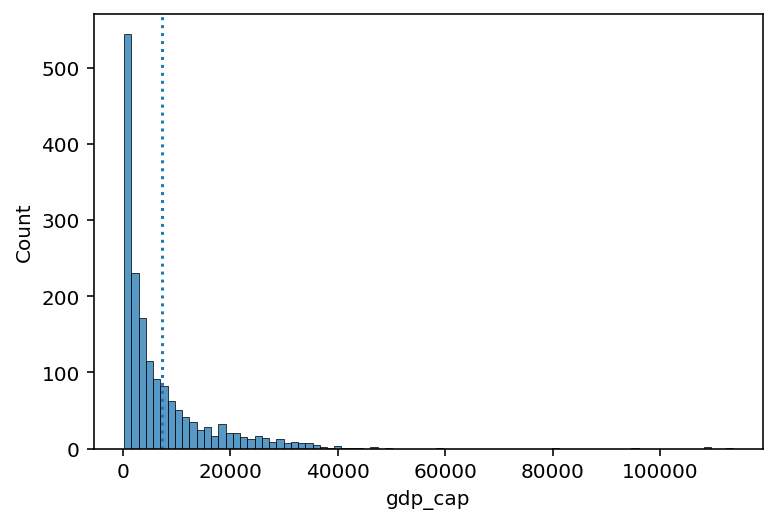

In [9]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted")

#### Check-in

Could you calculate the mean of the `continent` column? Why or why not?

In [10]:
### Your answer here

#### Solution

- You cannot calculate the mean of `continent`, which is a **categorical** variable.
- The `mean` can only be calculated for **continuous** variables.


#### Check-in

- Subtract each observation in `numbers` from the `mean` of this `list`.  
- Then, calculate the **sum** of these deviations from the `mean`.

What is their sum?

In [11]:
numbers = np.array([1, 2, 3, 4])
### Your code here

#### Solution

- The **sum of deviations** from the mean is equal to `0`.  
- This will be relevant when we discuss **standard deviation**. 

In [12]:
deviations = numbers - numbers.mean()
sum(deviations)

0.0

#### Interim summary

- The `mean` is one of the most common measures of central tendency.  
- It can only be used for **continuous** interval/ratio data.  
- The **sum of deviations** from the mean is equal to `0`. 
- The `mean` is most affected by **skew** and **outliers**.

### The *median*

> The **median** is calculated by sorting all values from least to greatest, then finding the value in the middle.

If there is an *even* number of values, you take the `mean` of the middle two values.

In [13]:
df_gapminder['gdp_cap'].median()

3531.8469885

#### Comparing `median` and `mean`

The `median` is less affected by the direction of skew.

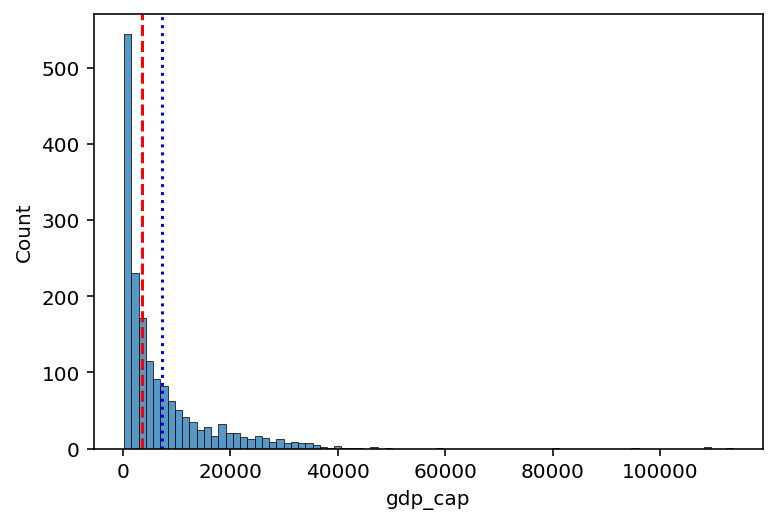

In [14]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted", color = "blue")
plt.axvline(df_gapminder['gdp_cap'].median(), linestyle = "dashed", color = "red")

#### Check-in

Could you calculate the median of the `continent` column? Why or why not?

In [15]:
### Your answer here

#### Solution

- You cannot calculate the median of `continent`, which is a **categorical** variable.
- The `median` can only be calculated for ordinal (ranked) or interval/ratio variables.


### The *mode*

> The **mode** is the most frequent value in a dataset. 

Unlike the `median` or `mean`, the `mode` can be used with **categorical** data.

In [16]:
df_pokemon = pd.read_csv("data/pokemon.csv")
### Most common type = Water
df_pokemon['Type 1'].mode()

0    Water
Name: Type 1, dtype: object

#### `mode()` returns multiple values?

- If multiple values *tie* for the most frequent, `mode()` will return all of them.
- This is because technically, a distribution can have multiple modes!

In [17]:
df_gapminder['gdp_cap'].mode()

0          241.165876
1          277.551859
2          298.846212
3          299.850319
4          312.188423
            ...      
1699     80894.883260
1700     95458.111760
1701    108382.352900
1702    109347.867000
1703    113523.132900
Name: gdp_cap, Length: 1704, dtype: float64

### Central tendency: a summary

|Measure|Can be used for:|Limitations|
|-------|----------------|-----------|
|Mean|Continuous data|Affected by skew and outliers|
|Median|Continuous data|Doesn't include *values* of all data points in calculation (only ranks)|
|Mode|Continuous and Categorical data|Only considers the *most* frequent; ignores other values|

## Quantiles

**Quantiles** are descriptive statistics that divide an ordered dataset into equal parts. The most common quantiles are:

- **Median** (quantile of order 0.5),
- **Quartiles** (divide data into 4 parts),
- **Deciles** (divide data into 10 parts),
- **Percentiles** (divide data into 100 parts).

### Definition

A quantile of order $q \in (0,1)$ is a value $x_q$ such that:

$$
P(X \leq x_q) = q
$$

In other words: $q \cdot 100\%$ of the values in the dataset are less than or equal to $x_q$.

### Formula (for an ordered dataset)

For a dataset $x_1, x_2, \ldots, x_n$ sorted in ascending order, the quantile of order $q$ is calculated as:

1. Compute the positional index:

$$
i = q \cdot (n + 1)
$$

2. If $i$ is an integer, the quantile is $x_i$.

3. If $i$ is not an integer, interpolate linearly between the neighboring values:

$$
x_q = x_{\lfloor i \rfloor} + (i - \lfloor i \rfloor) \cdot (x_{\lceil i \rceil} - x_{\lfloor i \rfloor})
$$

**Note:** In practice, different methods for calculating quantiles are used — libraries like NumPy or Pandas offer various modes (e.g., `method='linear'`, `method='midpoint'`).

### Example - Manual Calculation

For the dataset:  
$
[3, 7, 8, 5, 12, 14, 21, 13, 18]
$

1. Sort the data in ascending order:

$
[3, 5, 7, 8, 12, 13, 14, 18, 21]
$

2. Median (quantile of order 0.5):

The number of elements $n = 9$, the middle element is the 5th value:

$
\text{Median} = x_5 = 12
$

3. First quartile (Q1, quantile of order 0.25):

$
i = 0.25 \cdot (9 + 1) = 2.5
$

Interpolate between $x_2 = 5$ and $x_3 = 7$:

$
Q_1 = 5 + 0.5 \cdot (7 - 5) = 6
$

4. Third quartile (Q3, quantile of order 0.75):

$
i = 0.75 \cdot 10 = 7.5
$

Interpolate between $x_7 = 14$ and $x_8 = 18$:

$
Q_3 = 14 + 0.5 \cdot (18 - 14) = 16
$

### Deciles

**Deciles** divide data into 10 equal parts. For example:

- **D1** is the 10th percentile (quantile of order 0.1),
- **D5** is the median (0.5),
- **D9** is the 90th percentile (0.9).

The formula is the same as for general quantiles, using the appropriate $q$. For example, for D3:

$
q = \frac{3}{10} = 0.3
$

### Percentiles

**Percentiles** divide data into 100 equal parts. For example:

- **P25** = Q1,
- **P50** = median,
- **P75** = Q3,
- **P90** is the value below which 90% of the data lies.

Percentiles help us better understand the data distribution — for example, in standardized tests, results are often expressed as percentiles (e.g., "85th percentile" means someone scored better than 85% of the population).

---

### Quantiles - Summary

| Name       | Symbol | Quantile \( q \) | Meaning                          |
|------------|--------|------------------|----------------------------------|
| Q1         | Q1     | 0.25             | 25% of data ≤ Q1                |
| Median     | Q2     | 0.5              | 50% of data ≤ Median            |
| Q3         | Q3     | 0.75             | 75% of data ≤ Q3                |
| Decile 1   | D1     | 0.1              | 10% of data ≤ D1                |
| Decile 9   | D9     | 0.9              | 90% of data ≤ D9                |
| Percentile 95 | P95 | 0.95             | 95% of data ≤ P95               |

---

### Example - we compute quantiles

In [13]:
# Sample data
mydata = [3, 7, 8, 5, 12, 14, 21, 13, 18]
mydata_sorted = sorted(mydata)
print("Sorted data:", mydata_sorted)

Sorted data: [3, 5, 7, 8, 12, 13, 14, 18, 21]


In [14]:
# Converting to Pandas Series object
s = pd.Series(mydata)

# Quantiles
q1 = s.quantile(0.25)
median = s.quantile(0.5)
q3 = s.quantile(0.75)

# Deciles
d1 = s.quantile(0.1)
d9 = s.quantile(0.9)

# Percentiles
p95 = s.quantile(0.95)

print("Quantiles:")
print(f"Q1 (25%): {q1}")
print(f"Median (50%): {median}")
print(f"Q3 (75%): {q3}")
print("\nDeciles:")
print(f"D1 (10%): {d1}")
print(f"D9 (90%): {d9}")
print("\nPercentiles:")
print(f"P95 (95%): {p95}")

Quantiles:
Q1 (25%): 7.0
Median (50%): 12.0
Q3 (75%): 14.0

Deciles:
D1 (10%): 4.6
D9 (90%): 18.6

Percentiles:
P95 (95%): 19.799999999999997


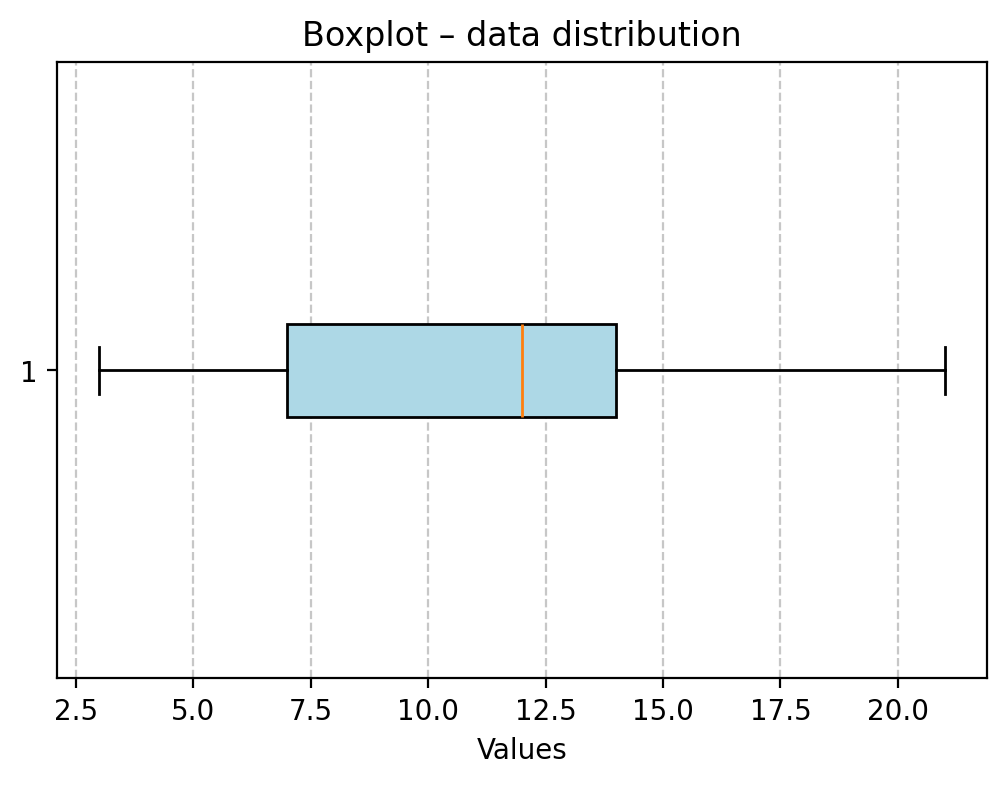

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot(mydata, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'));
plt.title("Boxplot – data distribution")
plt.xlabel("Values")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

### Your turn!

Looking at the aforementioned quantile results and the box plot, try to interpret these measures.

## Variability

> **Variability** (or **dispersion**) refers to the degree to which values in a distribution are *spread out*, i.e., different from each other.

### The `mean` hides variance

Both distributions have the *same* mean, but *different* **standard deviations**.

Text(0.5, 1.0, 'Higher variance')

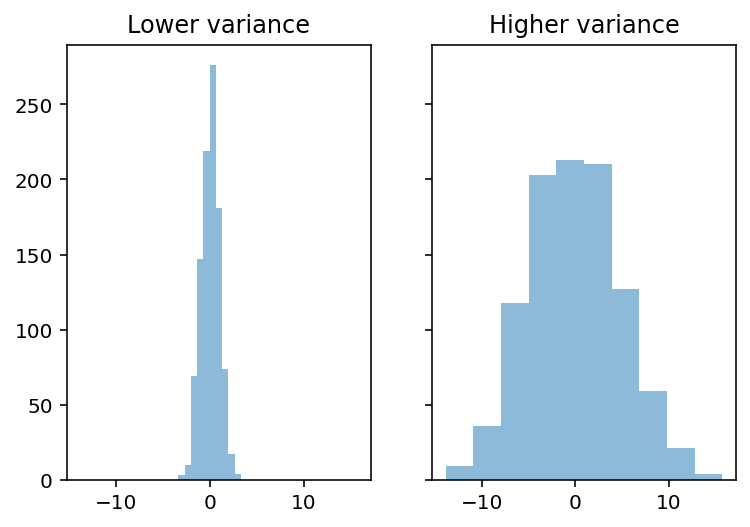

In [18]:
### Create distributions
d1 = np.random.normal(loc = 0, scale = 1, size = 1000)
d2 = np.random.normal(loc = 0, scale = 5, size = 1000)
### Create subplots
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
p1 = axes[0].hist(d1, alpha = .5)
p2 = axes[1].hist(d2, alpha = .5)
axes[0].set_title("Lower variance")
axes[1].set_title("Higher variance")

### Capturing variability

There are at least *three* major approaches to quantifying variability:

- **Range**: the difference between the `maximum` and `minimum` value. 
- **Interquartile range (IQR)**: The range of the middle 50% of data.  
- **Standard deviation**: the typical amount that scores deviate from the mean.

### Range

> **Range** is the difference between the `maximum` and `minimum` value.

Intuitive, but only considers two values in the entire distribution.

In [19]:
d1.max() - d1.min()

6.671539927777442

In [20]:
d2.max() - d2.min()

29.536578725663045

### IQR

> **Interquartile range (IQR)** is the difference between the value at the 75% percentile and the value at the 25% percentile.

Focuses on **middle 50%**, but still only considers two values.

In [21]:
## Get 75% and 25% values
q3, q1 = np.percentile(d1, [75 ,25])
q3 - q1

1.353946514402774

In [22]:
## Get 75% and 25% values
q3, q1 = np.percentile(d2, [75 ,25])
q3 - q1

6.923650741817414

### Standard deviation

> **Standard deviation (SD)** measures the *typical amount* that scores in a distribution deviate from the mean.

Things to keep in mind:

- SD is the *square root* of the [variance](https://en.wikipedia.org/wiki/Variance).  
- There are actually *two* measures of SD:
   - Population SD: when you're measuring the entire population of interest (very rare).  
   - Sample SD: when you're measuring a *sample* (the typical case); we'll focus on this one.

#### Sample SD

The formula for **sample standard deviation** of $X$ is as follows:

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- $n$: number of observations.
- $\bar{X}$: mean of $X$. 
- $X_i - \bar{X}$: difference between a particular value of $X$ and `mean`.
- $\sum$: *sum* of all these squared deviations.

#### Check-in

The formula involves summing the **squared deviations** of each value in $X$ with the mean of $X$. Why do you think we *square* these deviations first?

$\Large\sum{(X_i - \bar{X})^2}$

In [23]:
### Your answer here

#### Solution

If you simply summed the *raw deviations* from the `mean`, you'd get `0` (this is part of the definition of the `mean`).

#### SD, explained

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- First, calculate sum of *squared deviations*.
   - What is total squared deviation from the `mean`? 
- Then, divide by `n - 1`: normalize to number of observations.
   - What is *average* squared deviation from the `mean`?
- Finally, take the *square root*:
   - What is *average* deviation from the `mean`?

**Standard deviation** represents the *typical* or "average" deviation from the `mean`.

#### Calculating SD in `pandas`

In [24]:
df_pokemon['Attack'].std()

32.45736586949843

In [25]:
df_pokemon['HP'].std()

25.534669032332047

#### Watching out for `np.std`

- By default, `numpy.std` will calculate the **population standard deviation**!  
- Must modify the `ddof` parameter to calculate **sample standard deviation**.

This is a very common mistake.

In [26]:
### Pop SD
d1.std()

0.9851116165856464

In [27]:
### Sample SD
d1.std(ddof = 1)

0.9856045421189125

### Coefficient of variation (CV).

- The coefficient of variation (CV) is equal to the standard deviation divided by the mean.
- It is also known as “relative standard deviation.”

$$
CV = \frac{s}{\bar{x}} \cdot 100%
$$

In [18]:
import scipy.stats as stats
X = [2, 4, 4, 4, 5, 5, 7, 9]
mean = np.mean(X)

# Variance and standard deviation from scipy (for a sample!)
var_sample = stats.tvar(X)      # var for the sample
std_sample = stats.tstd(X)      # sd for the sample

# CV (sample)
cv_sample = (std_sample / mean) * 100

print(f"Mean: {mean}")
print(f"Var for the sample (scipy): {var_sample}")
print(f"SD for the sample (scipy): {std_sample}")
print(f"CV (scipy): {cv_sample:.2f}%")

Mean: 5.0
Var for the sample (scipy): 4.571428571428571
SD for the sample (scipy): 2.138089935299395
CV (scipy): 42.76%


## Measures of the shape of the distribution

Now we will look at measures of the shape of the distribution. There are two statistical measures that can tell us about the shape of a distribution. These are **skewness** and **kurtosis**. These measures can be used to tell us about the shape of the distribution of a data set.

## Skewness
- **Skewness** is a measure of the symmetry of a distribution, or more precisely, the lack of symmetry. 
- It is used to determine the lack of symmetry with respect to the mean of a data set. 
- It is a characteristic of deviation from the mean. 
- It is used to indicate the shape of a data distribution.

Skewness is a measure of the asymmetry of the distribution of data relative to the mean. It tells us whether the data are more “stretched” to one side.

Interpretation:

- Skewness > 0 - right-sided (positive): long tail on the right (larger values are more dispersed)
- Skewness < 0 - left (negative): long tail on the left (smaller values are more dispersed)
- Skewness ≈ 0 - symmetric distribution (e.g., normal distribution)

Formula (for the sample):

$$
A = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$
where:
	- $n$ - number of observations
	- $\bar{x}$ - sample mean
	- $s$ - standard deviation of the sample

![title](img/skos.png)


#### Negative skewness

- In this case, the data is skewed or shifted to the left. 
- By skewed to the left, we mean that the left tail is long relative to the right tail. 
- The data values may extend further to the left, but are concentrated on the right side. 
- So we are dealing with a long tail, and the distortion is caused by very small values that pull the mean down and it is smaller than the median. 
- In this case, we have **Mean < Median < Mode**.
      

#### Zero skewness

- This means that the data set is symmetric. 
- A dataset is symmetric if it looks the same to the left and right of the center point. 
- A dataset is bell-shaped or symmetric. 
- A perfectly symmetrical data set will have a skewness of zero. 
- So a normal distribution that is perfectly symmetric has a skewness of 0. 
- In this case, we have **Mean = Median = Mode**.
      

#### Positive skewness

- The data set is skewed or shifted to the right. 
- By skewed to the right, we mean that the right tail is long relative to the left tail. 
- The data values are concentrated on the right side. 
- There is a long tail on the right side, which is caused by very large values that pull the mean up and it is larger than the median. 
- So we have **Mean > Median > Mode**.

In [20]:
X = [2, 4, 4, 4, 5, 5, 7, 9]
skewness = stats.skew(X)
print(f"Skewness for X: {skewness:.4f}")


Skewness for X: 0.6562


### Your turn.

Try to interpret the above mentioned measures and calculate sample statistics for several Types of Pokémons.

In [ ]:
# Your code here

## Kurtosis

Contrary to what some textbooks claim, kurtosis does not measure the "flatness" or "peakedness" of a distribution.

Kurtosis depends on the intensity of extreme values, so it measures what happens in the "tails" of the distribution, and the shape of the "peak" is irrelevant!

### Sample Kurtosis:

$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4
$$

$$
\text{Excess Kurtosis} = \text{Kurtosis} - 3
$$

#### Reference Range for Kurtosis
- The reference standard is the normal distribution, which has a kurtosis of 3.  
- Often, instead of kurtosis, **excess kurtosis** is presented, where **excess kurtosis** is simply **kurtosis - 3**.  

#### Mesokurtic Curve
- A normal distribution has a kurtosis of exactly 3 (**excess kurtosis** of exactly 0).  
- Any distribution with kurtosis ≈3 (excess kurtosis ≈ 0) is called **mesokurtic**.

#### Platykurtic Curve
- A distribution with kurtosis < 3 (**excess kurtosis** < 0) is called **platykurtic**.  
- Compared to the normal distribution, its central peak is lower and wider, and its tails are shorter and thinner.

#### Leptokurtic Curve
- A distribution with kurtosis > 3 (**excess kurtosis** > 0) is called **leptokurtic**.  
- Compared to the normal distribution, its central peak is higher and sharper, and its tails are longer and thicker.

![title](img/ku.png)

In [21]:
from scipy.stats import kurtosis
mydata = [2, 4, 4, 4, 5, 5, 7, 9]
# Calculation of kurtosis (normalized by default, i.e. -3 already subtracted)
norm_kurtosis = kurtosis(mydata)
# If you want raw (without subtracting 3), set fisher=False
kurtosis_raw = kurtosis(mydata, fisher=False)
print("Normalized kurtosis:", norm_kurtosis)
print("Raw kurtosis:", kurtosis_raw)

Normalized kurtosis: -0.21875
Raw kurtosis: 2.78125


## Summary statistics

A great tool for creating elegant summaries of descriptive statistics in Markdown format (ideal for Jupyter Notebooks) is pandas, especially in combination with the .describe() function and tabulate.

Example with pandas + tabulate (nice table in Markdown):

In [22]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate

def markdown_summary(df, round_decimals=3):
    summary = df.describe().T  # We transpose so that the variables are in lines
    # Add skewness and kurtosis
    summary['Skewness'] = df.skew()
    summary['Kurtosis'] = df.kurt()
    # Rounding up the results
    summary = summary.round(round_decimals)
    # A table with the results!
    return tabulate(summary, headers='keys', tablefmt='github')

In [23]:
# We select only numerical columns for analysis
quantitative = df_pokemon.select_dtypes(include='number')

# We use our function
print(markdown_summary(quantitative))

|            |   count |    mean |     std |   min |    25% |   50% |    75% |   max |   Skewness |   Kurtosis |
|------------|---------|---------|---------|-------|--------|-------|--------|-------|------------|------------|
| #          |     800 | 362.814 | 208.344 |     1 | 184.75 | 364.5 | 539.25 |   721 |     -0.001 |     -1.166 |
| Total      |     800 | 435.102 | 119.963 |   180 | 330    | 450   | 515    |   780 |      0.153 |     -0.507 |
| HP         |     800 |  69.259 |  25.535 |     1 |  50    |  65   |  80    |   255 |      1.568 |      7.232 |
| Attack     |     800 |  79.001 |  32.457 |     5 |  55    |  75   | 100    |   190 |      0.552 |      0.17  |
| Defense    |     800 |  73.842 |  31.184 |     5 |  50    |  70   |  90    |   230 |      1.156 |      2.726 |
| Sp. Atk    |     800 |  72.82  |  32.722 |    10 |  49.75 |  65   |  95    |   194 |      0.745 |      0.298 |
| Sp. Def    |     800 |  71.902 |  27.829 |    20 |  50    |  70   |  90    |   230 |      0.85

To make a summary table cross-sectionally (that is, **by group**), you need to use the groupby() method on DataFrame, and then, for example, describe() or your own aggregation function.

Suppose you want to group data by “Type 1” column (i.e., for example, Pokémon type: Fire, Water, etc.), and then summarize quantitative variables (mean, variance, min, max, etc.).

In [24]:
# Grouping by ‘Type 1’ column and statistical summary of numeric columns
group_summary = df_pokemon.groupby('Type 1')[quantitative.columns].describe()
print(group_summary)

              #                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  334.492754  210.445160   10.0  168.00  291.0  543.00  666.0   
Dark       31.0  461.354839  176.022072  197.0  282.00  509.0  627.00  717.0   
Dragon     32.0  474.375000  170.190169  147.0  373.00  443.5  643.25  718.0   
Electric   44.0  363.500000  202.731063   25.0  179.75  403.5  489.75  702.0   
Fairy      17.0  449.529412  271.983942   35.0  176.00  669.0  683.00  716.0   
Fighting   27.0  363.851852  218.565200   56.0  171.50  308.0  536.00  701.0   
Fire       52.0  327.403846  226.262840    4.0  143.50  289.5  513.25  721.0   
Flying      4.0  677.750000   42.437209  641.0  641.00  677.5  714.25  715.0   
Ghost      32.0  486.500000  209.189218   92.0  354.75  487.0  709.25  711.0   
Grass      70.0  344.871429  200.264385 

### Your turn!

Try to interpret some of the mentioned statistics.

## Detecting (potential) outliers with z-scores

Defining and detecting outliers is notoriously difficult.

- Sometimes, an observation in a histogram clearly *looks* like an outlier. 
- But how do we quantify this?

### What is a z-score?

> A **z-score** is a *standardized* measure of how many any given point deviates from the mean:

$Z = \frac{X - \mu}{\sigma}$

This is useful because it allows us to quantify the **standardized distance** between some observation and the mean.

#### Calculating z-scores

In [43]:
## Original distribution
numbers

array([1, 2, 3, 4])

In [44]:
## z-scored distribution
numbers_z = (numbers - numbers.mean()) / numbers.std(ddof=1)
numbers_z

array([-1.161895  , -0.38729833,  0.38729833,  1.161895  ])

#### Check-in

Can anyone deduce why a z-score would be useful for **defining** outliers?

### Z-scores and outliers

> **Outliers** are data points that differ significantly from other points in a distribution.

- A **z-score** gives us a *standardized measure* of how different a given value is from the rest of the distribution.
- We can define thresholds, e.g.: 

$\Large z ≥ |3|$

### Testing our operationalization

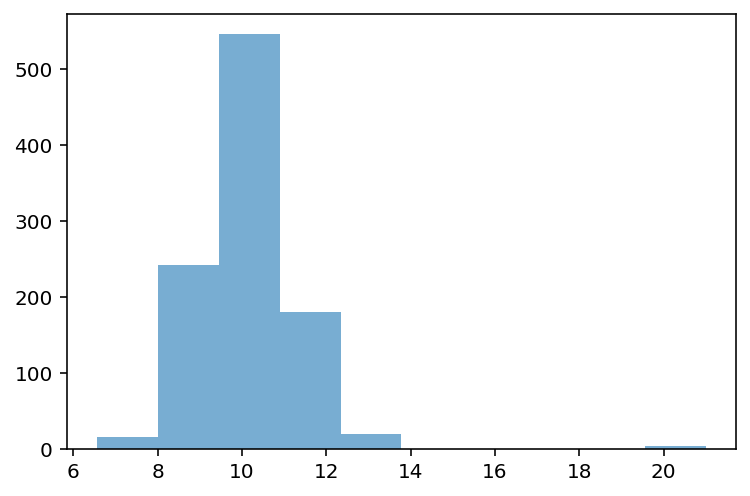

In [45]:
## First, let's define a distribution with some possible outliers
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
upper_outliers = np.array([21, 21, 21, 21]) ## some random outliers
data = np.concatenate((norm, upper_outliers))
p = plt.hist(data, alpha = .6)

#### Z-scoring our distribution

What is the **z-score** of the values way off to the right?

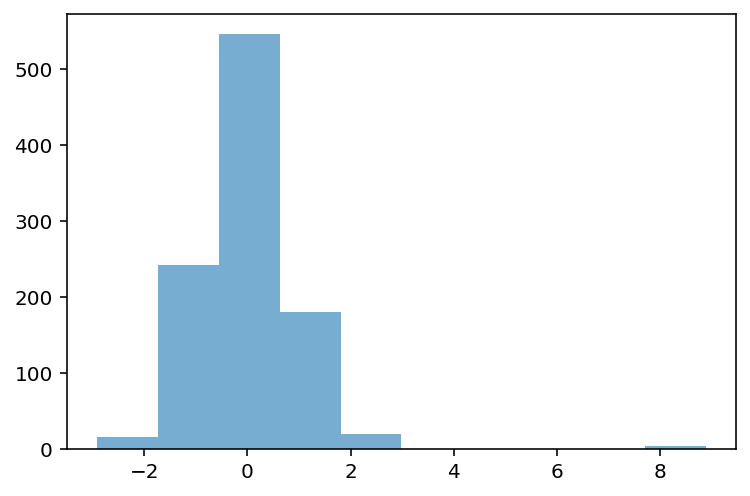

In [46]:
data_z = (data - data.mean()) / data.std(ddof=1)
p = plt.hist(data_z, alpha = .6)

#### Removing outliers

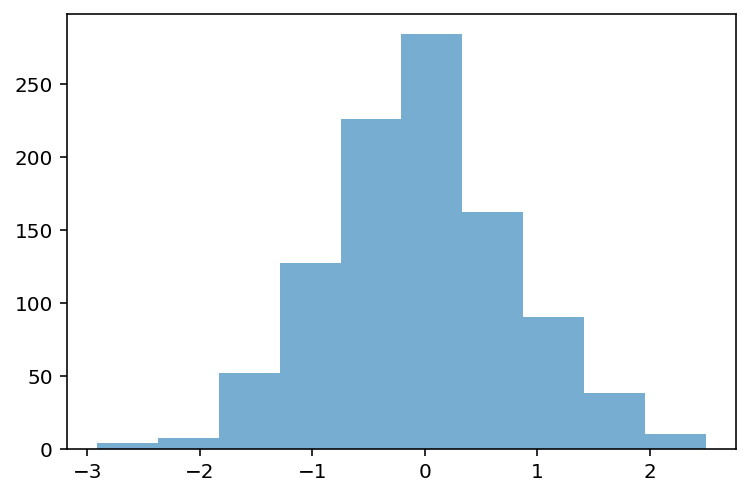

In [47]:
data_z_filtered = data_z[abs(data_z)<=3]
p = plt.hist(data_z_filtered, alpha = .6)

### Check-in

Can anyone think of challenges or problems with this approach to detecting outliers?

### Caveats, complexity, and context

- There is not a single unifying definition of what an outlier is.  
- Depending on the *shape* of the distribution, removing observations where $z > |3|$ might be removing important data. 
   - E.g., in a **skewed** distribution, we might just be "cutting off the tail".  
- Even if the values *do* seem like outliers, there's a philosophical question of **why** and **what that means**.
   - Are those values "random"? What's the underlying **data-generating process*?

This is why statistics is not a mere matter of applying *formulas*. **Context always matters!**

## Describing *bivariate* data with correlations

- So far, we've been focusing on *univariate data*: a single distribution.
- What if we want to describe how *two distributions* relate to each other?
   - For today, we'll focus on *continuous distributions*.

### Bivariate relationships: `height`

- A classic example of **continuous bivariate data** is the `height` of a `parent` and `child`.  
- [These data were famously collected by Karl Pearson](https://www.kaggle.com/datasets/abhilash04/fathersandsonheight).

In [26]:
df_height = pd.read_csv("data/wrangling/height.csv")
df_height.head(2)

,Father,Son
0,65.0,59.8
1,63.3,63.2


#### Plotting Pearson's height data

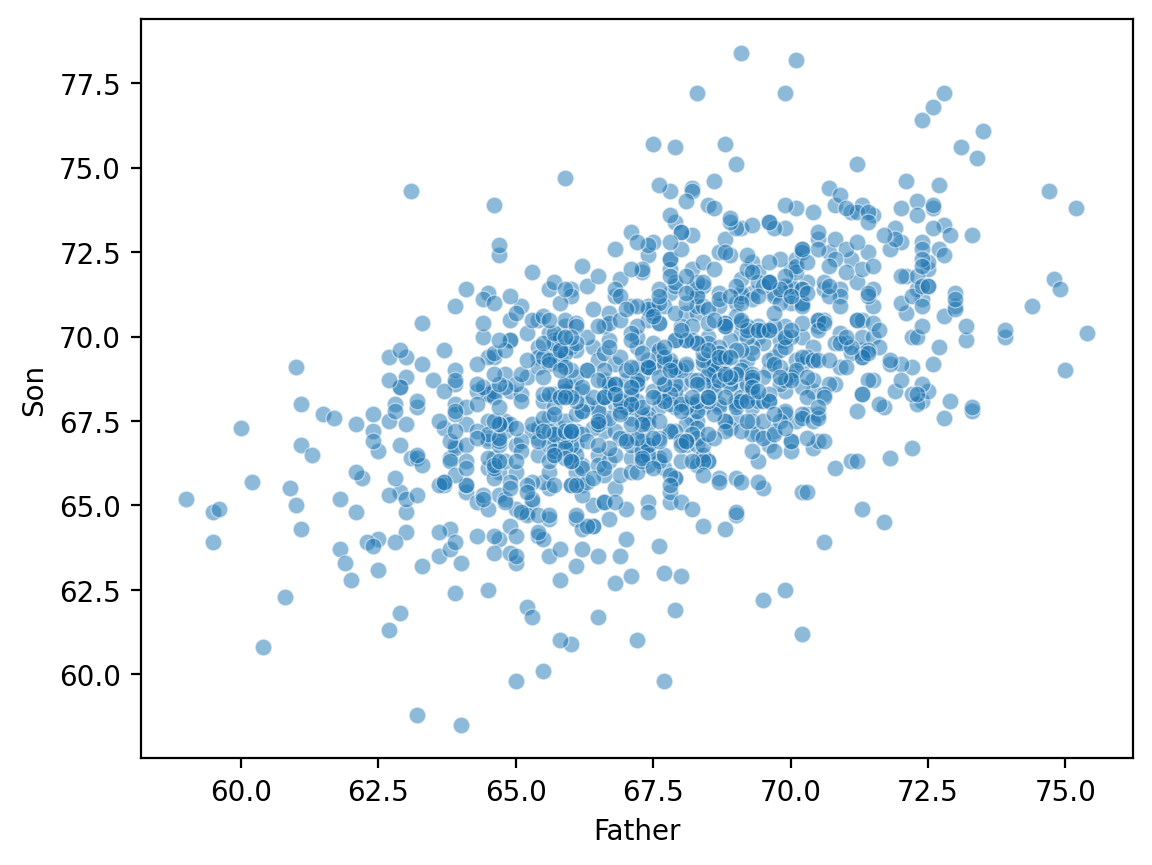

In [27]:
sns.scatterplot(data = df_height, x = "Father", y = "Son", alpha = .5);

### Introducing linear correlations

> A **correlation coefficient** is a number between $[–1, 1]$ that describes the relationship between a pair of variables.

Specifically, **Pearson's correlation coefficient** (or Pearson's $r$) describes a (presumed) *linear* relationship.

Two key properties:

- **Sign**: whether a relationship is positive (+) or negative (–).  
- **Magnitude**: the strength of the linear relationship.

$$
r = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) }{ \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2 } \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2 } }
$$

Where:
- $r$ - Pearson correlation coefficient
- $x_i$, $y_i$ - values of the variables
- $\bar{x}$, $\bar{y}$ - arithmetic means
- $n$ - number of observations

Pearson's correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. Its value ranges from -1 to 1:
- 1 → perfect positive linear correlation
- 0 → no linear correlation
- -1 → perfect negative linear correlation

This coefficient does not tell about nonlinear correlations and is sensitive to outliers.

### Calculating Pearson's $r$ with `scipy`

`scipy.stats` has a function called `pearsonr`, which will calculate this relationship for you.

Returns two numbers:

- $r$: the correlation coefficent.  
- $p$: the **p-value** of this correlation coefficient, i.e., whether it's *significantly different* from `0`.

In [28]:
ss.pearsonr(df_height['Father'], df_height['Son'])

PearsonRResult(statistic=np.float64(0.5011626808075912), pvalue=np.float64(1.2729275743661585e-69))

#### Check-in

Using `scipy.stats.pearsonr` (here, `ss.pearsonr`), calculate Pearson's $r$ for the relationship between the `Attack` and `Defense` of Pokemon.

- Is this relationship positive or negative?  
- How strong is this relationship?

In [66]:
### Your code here

#### Solution

In [69]:
ss.pearsonr(df_pokemon['Attack'], df_pokemon['Defense'])

(0.4386870551184888, 5.858479864290367e-39)

#### Check-in

Pearson'r $r$ measures the *linear correlation* between two variables. Can anyone think of potential limitations to this approach?

### Limitations of Pearson's $r$

- Pearson's $r$ *presumes* a linear relationship and tries to quantify its strength and direction.  
- But many relationships are **non-linear**!  
- Unless we visualize our data, relying only on Pearson'r $r$ could mislead us.

#### Non-linear data where $r = 0$

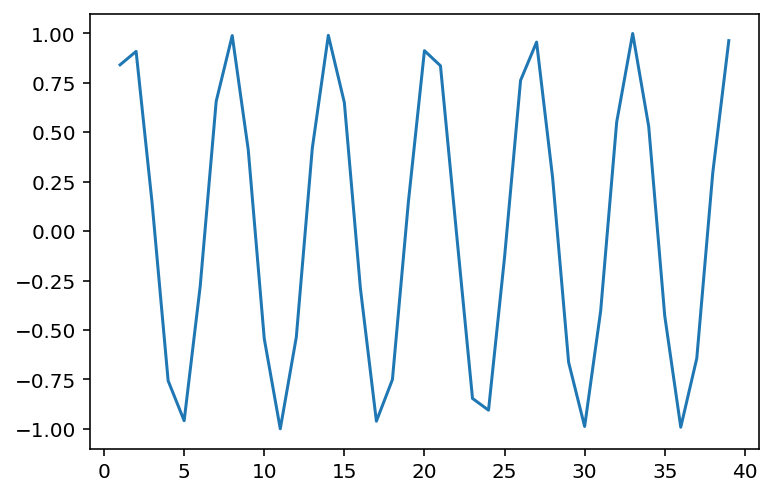

In [83]:
x = np.arange(1, 40)
y = np.sin(x)
p = sns.lineplot(x = x, y = y)

In [86]:
### r is close to 0, despite there being a clear relationship!
ss.pearsonr(x, y)

(-0.04067793461845844, 0.8057827185936633)

#### When $r$ is invariant to the real relationship

All these datasets have roughly the same **correlation coefficient**.

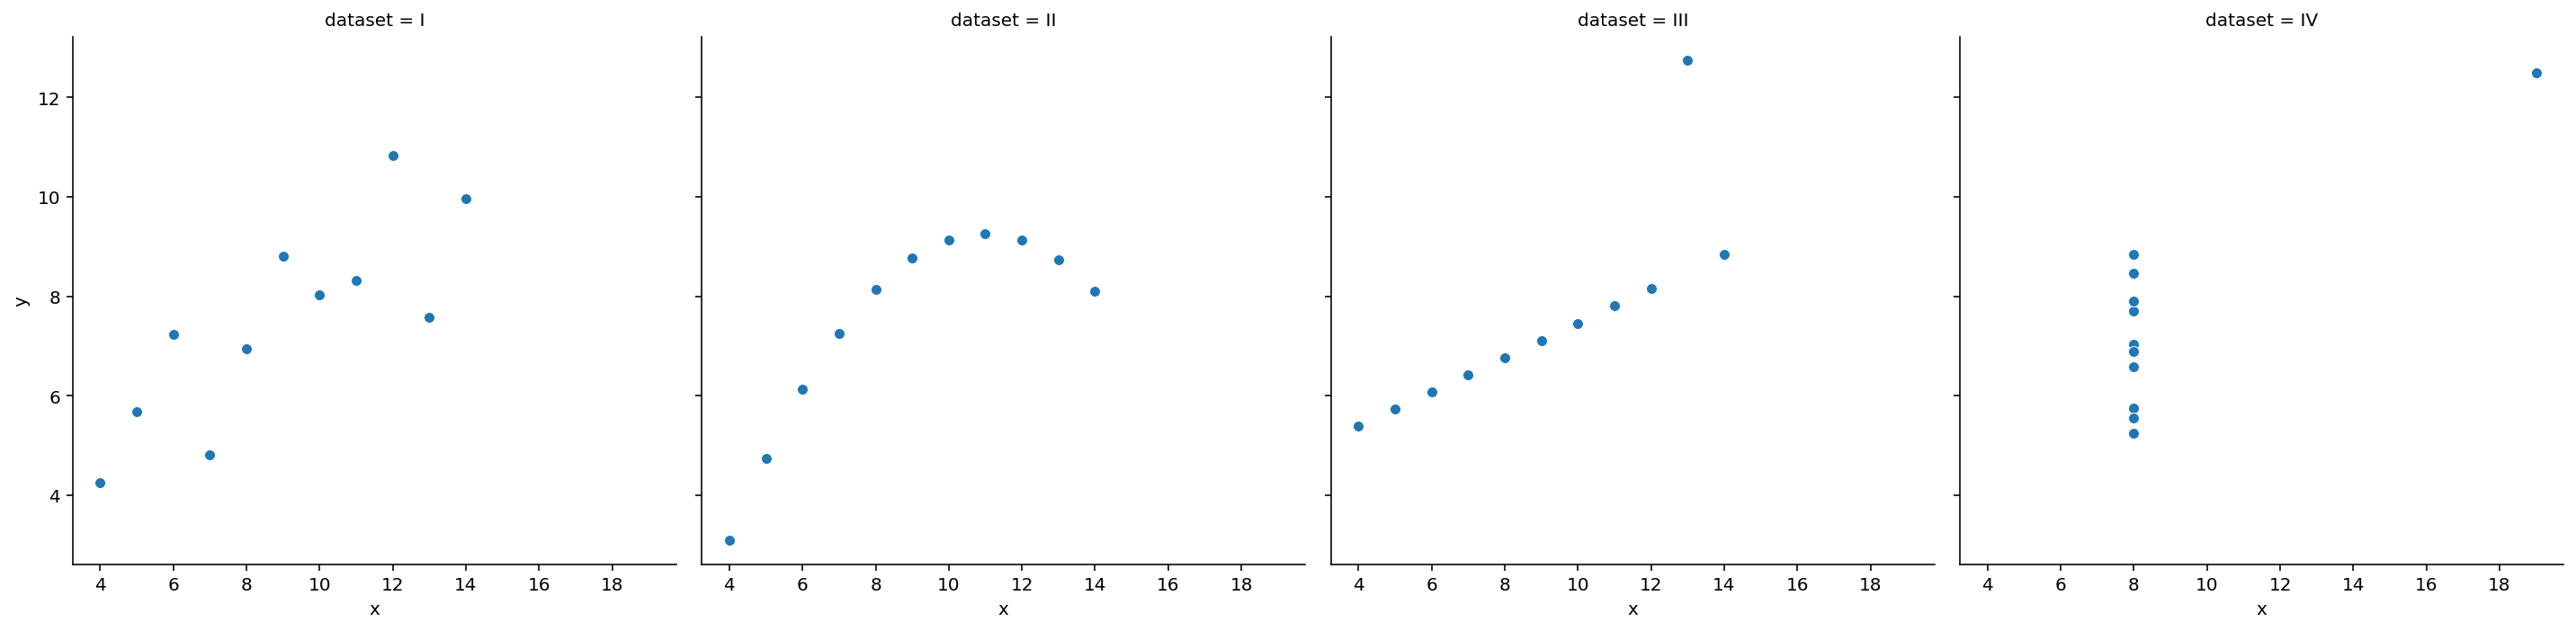

In [87]:
df_anscombe = sns.load_dataset("anscombe")
sns.relplot(data = df_anscombe, x = "x", y = "y", col = "dataset")

## Rank Correlations

Rank correlations are measures of the strength and direction of a monotonic (increasing or decreasing) relationship between two variables. Instead of numerical values, they use ranks, i.e., positions in an ordered set.

They are less sensitive to outliers and do not require linearity (unlike Pearson's correlation).

### Types of Rank Correlations

1. $ρ$ (rho) **Spearman's**
- Based on the ranks of the data.
- Value: from –1 to 1.
- Works well for monotonic but non-linear relationships.

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Where:
- $d_i$ – differences between the ranks of observations,
- $n$ – number of observations.

2. $τ$ (tau) **Kendall's**
- Measures the number of concordant vs. discordant pairs.
- More conservative than Spearman's – often yields smaller values.
- Also ranges from –1 to 1.

$$
\tau = \frac{(C - D)}{\frac{1}{2}n(n - 1)}
$$

Where:
- $τ$ — Kendall's correlation coefficient,
- $C$ — number of concordant pairs,
- $D$ — number of discordant pairs,
- $n$ — number of observations,
- $\frac{1}{2}n(n - 1)$ — total number of possible pairs of observations.

What are concordant and discordant pairs?
- Concordant pair: if $x_i$ < $x_j$ and $y_i$ < $y_j$, or $x_i$ > $x_j$ and $y_i$ > $y_j$.
- Discordant pair: if $x_i$ < $x_j$ and $y_i$ > $y_j$, or $x_i$ > $x_j$ and $y_i$ < $y_j$.

### When to use rank correlations?
- When the data are not normally distributed.
- When you suspect a non-linear but monotonic relationship.
- When you have rank correlations, such as grades, ranking, preference level.

| Correlation type | Description | When to use |
|------------------|-----------------------------------------------------|----------------------------------------|
| Spearman's (ρ) | Monotonic correlation, based on ranks | When data are nonlinear or have outliers |
| Kendall's (τ) | Counts the proportion of congruent and incongruent pairs | When robustness to ties is important |

### Interpretation of correlation values

| Range of values | Correlation interpretation |
|------------------|----------------------------------|
| 0.8 - 1.0 | very strong positive |
| 0.6 - 0.8 | strong positive |
| 0.4 - 0.6 | moderate positive |
| 0.2 - 0.4 | weak positive |
| 0.0 - 0.2 | very weak or no correlation |
| < 0 | similarly - negative correlation |

### Comparison of Correlation Coefficients

| Property                | Pearson (r)                   | Spearman (ρ)                        | Kendall (τ)                          |
|-------------------------|-------------------------------|--------------------------------------|---------------------------------------|
| What it measures?       | Linear relationship           | Monotonic relationship (based on ranks) | Monotonic relationship (based on pairs) |
| Data type               | Quantitative, normal distribution | Ranks or ordinal/quantitative data  | Ranks or ordinal/quantitative data   |
| Sensitivity to outliers | High                          | Lower                               | Low                                   |
| Value range             | –1 to 1                       | –1 to 1                             | –1 to 1                               |
| Requires linearity      | Yes                           | No                                  | No                                    |
| Robustness to ties      | Low                           | Medium                              | High                                  |
| Interpretation          | Strength and direction of linear relationship | Strength and direction of monotonic relationship | Proportion of concordant vs discordant pairs |
| Significance test       | Yes (`scipy.stats.pearsonr`)  | Yes (`spearmanr`)                   | Yes (`kendalltau`)                   |

Brief summary:
- Pearson - best when the data are normal and the relationship is linear.
- Spearman - works better for non-linear monotonic relationships.
- Kendall - more conservative, often used in social research, less sensitive to small changes in data.

### Your Turn

For the Pokemon dataset, find the pairs of variables that are most appropriate for using one of the quantitative correlation measures. Calculate them, then visualize them.

In [29]:
from scipy.stats import pearsonr, spearmanr, kendalltau

## Your code here

## Correlation of Qualitative Variables

A categorical variable is one that takes descriptive values ​​that represent categories—e.g. Pokémon type (Fire, Water, Grass), gender, status (Legendary vs. Normal), etc.

Such variables cannot be analyzed directly using correlation methods for numbers (Pearson, Spearman, Kendall). Other techniques are used instead.

### Contingency Table

A contingency table is a special cross-tabulation table that shows the frequency (i.e., the number of cases) for all possible combinations of two categorical variables.

It is a fundamental tool for analyzing relationships between qualitative features.

#### Chi-Square Test of Independence

The Chi-Square test checks whether there is a statistically significant relationship between two categorical variables.

Concept:

We compare:
- observed values (from the contingency table),
- with expected values, assuming the variables are independent.

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:
- $O_{ij}$ – observed count in cell ($i$, $j$),
- $E_{ij}$ – expected count in cell ($i$, $j$), assuming independence.

### Example: Calculating Expected Values and Chi-Square Statistic in Python

Here’s how you can calculate the **expected values** and **Chi-Square statistic (χ²)** step by step using Python.

---

#### Step 1: Create the Observed Contingency Table
We will use the Pokémon example:

| Type 1 | Legendary = False | Legendary = True | Total |
|--------|-------------------|------------------|-------|
| Fire   | 18                | 5                | 23    |
| Water  | 25                | 3                | 28    |
| Grass  | 20                | 2                | 22    |
| Total  | 63                | 10               | 73    |

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Observed values (contingency table)
observed = np.array([
    [18, 5],  # Fire
    [25, 3],  # Water
    [20, 2]   # Grass
])

# Convert to DataFrame for better visualization
observed_df = pd.DataFrame(
    observed,
    columns=["Legendary = False", "Legendary = True"],
    index=["Fire", "Water", "Grass"]
)
print("Observed Table:")
print(observed_df)

Observed Table:
       Legendary = False  Legendary = True
Fire                  18                 5
Water                 25                 3
Grass                 20                 2


Step 2: Calculate Expected Values
The expected values are calculated using the formula:

$$ E_{ij} = \frac{\text{Row Total} \times \text{Column Total}}{\text{Grand Total}} $$

You can calculate this manually or use scipy.stats.chi2_contingency, which automatically computes the expected values.

In [31]:
# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(observed)

# Convert expected values to DataFrame for better visualization
expected_df = pd.DataFrame(
    expected,
    columns=["Legendary = False", "Legendary = True"],
    index=["Fire", "Water", "Grass"]
)
print("\nExpected Table:")
print(expected_df)


Expected Table:
       Legendary = False  Legendary = True
Fire           19.849315          3.150685
Water          24.164384          3.835616
Grass          18.986301          3.013699


Step 3: Calculate the Chi-Square Statistic
The Chi-Square statistic is calculated using the formula:

$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

This is done automatically by scipy.stats.chi2_contingency, but you can also calculate it manually:

In [32]:
# Manual calculation of Chi-Square statistic
chi2_manual = np.sum((observed - expected) ** 2 / expected)
print(f"\nChi-Square Statistic (manual): {chi2_manual:.4f}")


Chi-Square Statistic (manual): 1.8638


Step 4: Interpret the Results
The chi2_contingency function also returns:

p-value: The probability of observing the data if the null hypothesis (independence) is true.
Degrees of Freedom (dof): Calculated as (rows - 1) * (columns - 1).

In [33]:
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 1.8638
p-value: 0.3938
Degrees of Freedom: 2


**Interpretation of the Chi-Square Test Result:**

| Value               | Meaning                                         |
|---------------------|-------------------------------------------------|
| High χ² value       | Large difference between observed and expected values |
| Low p-value         | Strong basis to reject the null hypothesis of independence |
| p < 0.05            | Statistically significant relationship between variables |

### Qualitative Correlations

#### Cramér's V

**Cramér's V** is a measure of the strength of association between two categorical variables. It is based on the Chi-Square test but scaled to a range of 0–1, making it easier to interpret the strength of the relationship.

$$
V = \sqrt{ \frac{\chi^2}{n \cdot (k - 1)} }
$$

Where:
- $\chi^2$ – Chi-Square test statistic,
- $n$ – number of observations,
- $k$ – the smaller number of categories (rows/columns) in the contingency table.

---

#### Phi Coefficient ($φ$)

Application:
- Both variables must be dichotomous (e.g., Yes/No, 0/1), meaning the table must have the smallest size of **2×2**.
- Ideal for analyzing relationships like gender vs purchase, type vs legendary.

$$
\phi = \sqrt{ \frac{\chi^2}{n} }
$$

Where:
- $\chi^2$ – Chi-Square test statistic for a 2×2 table,
- $n$ – number of observations.

---

#### Tschuprow’s T

**Tschuprow’s T** is a measure of association similar to **Cramér's V**, but it has a different scale. It is mainly used when the number of categories in the two variables differs. This is a more advanced measure applicable to a broader range of contingency tables.

$$
T = \sqrt{\frac{\chi^2}{n \cdot (k - 1)}}
$$

Where:
- $\chi^2$ – Chi-Square test statistic,
- $n$ – number of observations,
- $k$ – the smaller number of categories (rows or columns) in the contingency table.

Application: Tschuprow’s T is useful when dealing with contingency tables with varying numbers of categories in rows and columns.

---

### Summary - Qualitative Correlations

| Measure            | What it measures                                       | Application                     | Value Range     | Strength Interpretation       |
|--------------------|--------------------------------------------------------|---------------------------------|------------------|-------------------------------|
| **Cramér's V**     | Strength of association between nominal variables      | Any categories                  | 0 – 1           | 0.1–weak, 0.3–moderate, >0.5–strong |
| **Phi ($φ$)**      | Strength of association in a **2×2** table             | Two binary variables            | -1 – 1          | Similar to correlation        |
| **Tschuprow’s T**  | Strength of association, alternative to Cramér's V     | Tables with similar category counts | 0 – 1      | Less commonly used            |
| **Chi² ($χ²$)**    | Statistical test of independence                       | All categorical variables       | 0 – ∞           | Higher values indicate stronger differences |

### Example

Let's investigate whether the Pokémon's type (type_1) is affected by whether the Pokémon is legendary.

We'll use the **scipy** library.

This library already has built-in functions for calculating various qualitative correlation measures.

In [35]:
from scipy.stats.contingency import association

# Contingency table:
ct = pd.crosstab(df_pokemon["Type 1"], df_pokemon["Legendary"])

# Calculating Cramér's V measure
V = association(ct, method="cramer") # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html#association

print(f"Cramer's V: {V}") # interpret!


Cramer's V: 0.3361928228447545


### Your turn

What visualization would be most appropriate for presenting a quantitative, ranked, and qualitative relationship?

Try to think about which pairs of variables could have which type of analysis based on the Pokemon data.

---

In [36]:
## Your code and discussion here

# Summary

There are many ways to *describe* our data:

- Measure **central tendency**.

- Measure its **variability**; **skewness** and **kurtosis**.

- Measure what **correlations** our data have.

All of these are **useful** and all of them are also **exploratory data analysis** (EDA).